In [1]:

import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Import dataset as a pandas dataframe
heart = pd.read_csv('../input/heart-disease-uci/heart.csv')

#Target column is intended output and rest are features
X= heart.drop('target',axis=1)
y= heart['target']

#Splitting the data in  70:30 Train-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)



SVM classifier Accuracy: 
Classification report for SVM classifier:
              precision    recall  f1-score   support

           0       0.74      0.60      0.67        43
           1       0.70      0.81      0.75        48

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



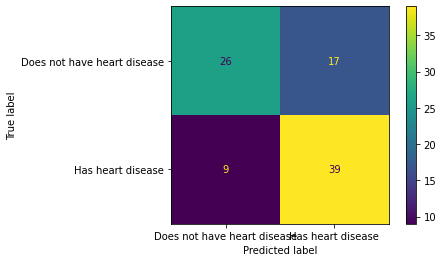

In [2]:
#Building an SVM classifier
svclassifier=SVC(kernel='poly',degree=2)
svclassifier.fit(X_train,y_train)
y_svc=svclassifier.predict(X_test)
svc_score=svclassifier.score(X_test,y_test)
print("SVM classifier Accuracy: ")
#Confusion matrix and classification report for SVM classifier
print("Classification report for SVM classifier:")
plot_confusion_matrix(svclassifier, X_test, y_test, display_labels=["Does not have heart disease", "Has heart disease"])
print(classification_report(y_test,y_svc))



Logistic Regression Accuracy: 0.8241758241758241
Classification report for Logistic Regression classifier:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.82      0.85      0.84        48

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



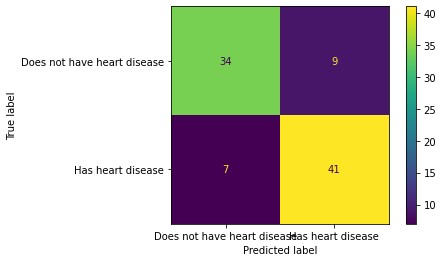

In [3]:
#Building a logistic regression classifier
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_score = LR.score(X_test, y_test)
print("Logistic Regression Accuracy:" ,LR_score)
ylr = LR.predict(X_test)
#Confusion matrix and classification report for Logistic regression classifier
print("Classification report for Logistic Regression classifier:")
plot_confusion_matrix(LR,X_test,y_test,display_labels=["Does not have heart disease", "Has heart disease"])
print (classification_report(y_test, ylr))



Decision Tree Accuracy: 0.7802197802197802
Classification report for decision tree classifier:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        43
           1       0.82      0.75      0.78        48

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



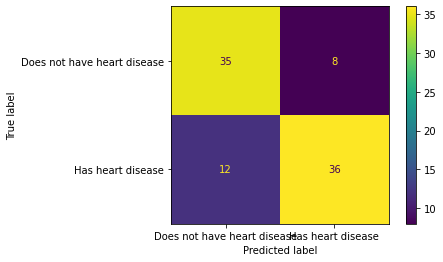

In [4]:
#Building a decision tree classifier
lf_dt = DecisionTreeClassifier(random_state=5)
clf_dt = lf_dt.fit(X_train, y_train)
#Confusion matrix and classification report for Logistic regression classifier
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have heart disease", "Has heart disease"])
DT_score = clf_dt.score(X_test, y_test)
print("Decision Tree Accuracy:" , DT_score)
print("Classification report for decision tree classifier:")
ydt=clf_dt.predict(X_test)
print(classification_report(y_test,ydt))



Random Forest Accuracy: 
Classification report for random forest classifier:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.90      0.92      0.91        48

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



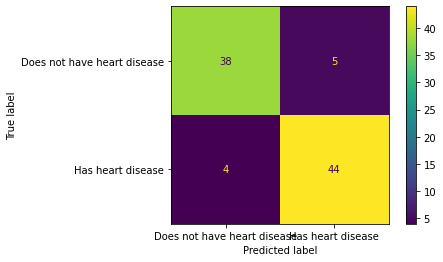

In [5]:
#Building a random forest classifier
rfc =  RandomForestClassifier(random_state=5).fit(X_train, y_train)
rfc_score=rfc.score(X_test,y_test)
print("Random Forest Accuracy: ")
#Confusion matrix and classification report for random forest classifier
print("Classification report for random forest classifier:")
plot_confusion_matrix(rfc, X_test, y_test, display_labels=["Does not have heart disease", "Has heart disease"])
yrfc=rfc.predict(X_test)
print(classification_report(y_test,yrfc))



Extreme Random Forest Accuracy: 
Classification report for extreme random forest classifier:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.90      0.90      0.90        48

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



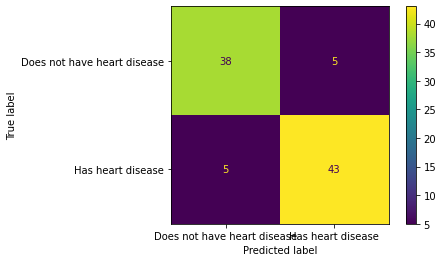

In [6]:
#Building an extreme random forest classifier
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
erfc = ExtraTreesClassifier(**params)
erfc.fit(X_train, y_train)
erfc_score=erfc.score(X_test,y_test)
print("Extreme Random Forest Accuracy: ")
#Confusion matrix and classification report for random forest classifier
print("Classification report for extreme random forest classifier:")
plot_confusion_matrix(erfc, X_test, y_test, display_labels=["Does not have heart disease", "Has heart disease"])
yerfc=erfc.predict(X_test)
print(classification_report(y_test,yerfc))



In [7]:
#Comparing the accuracy of the supervised learning models
data = [['SVM classifier',svc_score],['Logistic Regression', LR_score],['Decision Tree', DT_score],  ['Random Forest', rfc_score],['Extreme Random Forest',erfc_score]] 
accuracy = pd.DataFrame(data,columns = ['Model', 'Accuracy',])
print('Accuracy comparison of supervised learning models\n',accuracy)

Accuracy comparison of supervised learning models
                    Model  Accuracy
0         SVM classifier  0.714286
1    Logistic Regression  0.824176
2          Decision Tree  0.780220
3          Random Forest  0.901099
4  Extreme Random Forest  0.890110
